In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sys import argv, exit
from astropy.io import fits
from scipy.special import erf
from scipy.integrate import quad
import mgutils as mg, mgutils.constants as co



def effective_volume(sigma_min, hz=300):
    """ This is the solution to Eq 15 of Rix2021, solved for me by Anton Biryukov
    """
    return 2 * np.pi * hz**3 / sigma_min / hz * np.exp(- 1 / 2 / sigma_min**2 / hz**2) + \
            np.pi**(3/2) * np.sqrt(2) * hz**3 * (1 / sigma_min**2 / hz**2 - 1) * erf(1 / np.sqrt(2) / sigma_min / hz)


def find_veff_period(periods, dlim=np.inf, maglim=19.5):
    dmax = np.minimum(dlim, find_dmax(periods, maglim))
    return effective_volume(1/dmax)



def find_absmag(p):
    """ This is the fit that is done by the script magnitudes.py. 
    """
    print("WARNING!! UPDATE ABS MAGNITUDE FIT")
    return p*0.06821 + 8.3467



def find_dmax(p, maglim):
    return 10**((maglim - find_absmag(p))/5 + 1)


def period_prob_plain(porb, alpha, pmin=0, pmax=70):
    norm = 1/(alpha + 1) * (pmax**(alpha+1) - pmin**(alpha+1))
    return porb**alpha / norm




In [40]:


def period_prob_volume(porb, alpha, maglim=19.5):
    def period_prob_volume_unnormed(porb, alpha, maglim):
        return porb**alpha * find_veff_period(porb, dlim=300, maglim=maglim)
    norm = quad(period_prob_volume_unnormed, 0, 70, args=(alpha, maglim))[0]
    return period_prob_volume_unnormed(porb, alpha, maglim=maglim) / norm


In [41]:

def period_prob_eclipse(porb, alpha, xi=-0.2, maglim=19.5):
    def period_prob_eclipse_unnormed(porb, alpha, xi, maglim):
        beta = alpha + 2 / (9 * xi - 3)
        return (porb**alpha + porb**beta) * find_veff_period(porb, dlim=np.inf, maglim=maglim)
    norm = quad(period_prob_eclipse_unnormed, 0, 70, args=(alpha, xi, maglim))[0]
    return period_prob_eclipse_unnormed(porb, alpha, xi=xi, maglim=maglim) / norm
    

WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS

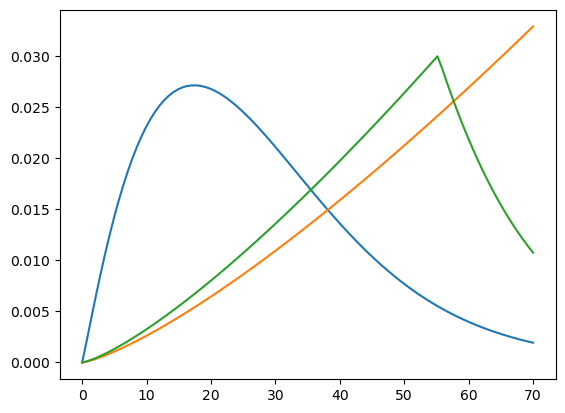

WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS MAGNITUDE FIT
WARNING!! UPDATE ABS

/tmp/ipykernel_7897/1059024155.py:11: RuntimeWarning: invalid value encountered in divide
  plt.plot(periods, period_prob_eclipse(periods, alpha) / period_prob_volume(periods, alpha))


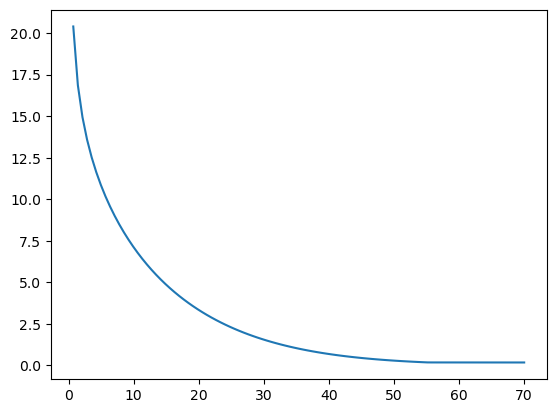

In [46]:
periods = np.linspace(0,70,100)

alpha=1.3

plt.plot(periods, period_prob_eclipse(periods, alpha))
plt.plot(periods, period_prob_plain(periods, alpha))
plt.plot(periods, period_prob_volume(periods, alpha))

plt.show()

plt.plot(periods, period_prob_eclipse(periods, alpha) / period_prob_volume(periods, alpha))

